# Global Video Game Sales Data Analysis

### Step 0: Importing Data

Initial setup of Python modules

In [70]:
#!py -m pip install pandas
#!py -m pip install zipfile
#!py -m pip install kaggle
#!py -m pip install matplotlib
#!py -m pip install seaborn

import pandas as pd
import zipfile
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

Get Dataset with Kaggle API

In [71]:
kaggle.api.authenticate()

kaggle.api.dataset_download_files('thedevastator/global-video-game-sales')

In [72]:
#unzip dataset file
unzipped_data = 'global-video-game-sales.zip'
with zipfile.ZipFile(unzipped_data, 'r') as file:
    file.extractall()

In [73]:
game_sales = pd.read_csv('vgsales.csv')

### Step 1: Initial Exploration of the Data

Looking at the shape of the data to get an understanding of the number of rows and columns.

In [74]:
game_sales.shape

(16598, 11)

The data has 16598 rows with 11 columns.
<br><br>Using game_sales.info(), we can see some attributes of the data.

In [75]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The attributes are the column names, the non-null rows in each column, and the data types of each column.
<br>Already we can see that the number of non-null rows in each column are not equal which means the data will need cleaning.

<br>To further confirm the amount of null data, we can sum up the amount of null values in each column.

In [76]:
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looking at game_sales, we can get a clearer understanding of how the dataset is structured.

In [77]:
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


With this inital data exploration in mind, there are a few questions I am interested in answering.

These questions are as follows:
<br>1. What game genres are best and worst selling?
<br>2. What is the most popular platform for games?
<br>3. What companies have the most successful games?
<br>4. What genres and platforms have the most sales in each country? (NA, EU, JP, and Other)
<br>5. Forecast the future of game sales based on previous years sales


### Step 2: Preparing the Data

Check for duplicate rows

In [78]:
game_sales.loc[game_sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


No rows are duplicated in the dataset.
<br>We could also check for duplicated items in each column.
<br>However, because of the type of data in this dataset each column could realistically have duplicate values.

The dataset has categorical data such as the Platform, Genre, and Publisher. That data needs to be converted to numerical data for analysis purposes.

In [79]:
game_sales_prepared = game_sales.copy()
game_sales_prepared['Platform'] = pd.factorize(game_sales.Platform)[0]
game_sales_prepared['Genre'] = pd.factorize(game_sales.Genre)[0]
game_sales_prepared['Publisher'] = pd.factorize(game_sales.Publisher)[0]
game_sales_prepared

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,0,2006.0,0,0,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,1,1985.0,1,0,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,0,2008.0,2,0,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,0,2009.0,0,0,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,2,1996.0,3,0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,8,2002.0,1,187,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,18,2003.0,6,51,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,6,2008.0,2,4,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,3,2010.0,4,507,0.00,0.01,0.00,0.00,0.01


### Step 3: Exploring Features

In [80]:
game_sales['Platform'].value_counts().head(5)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

In [81]:
game_sales['Platform'].value_counts().tail(5)

Platform
WS      6
3DO     3
TG16    2
GG      1
PCFX    1
Name: count, dtype: int64

This shows us the most popular and least popular platforms for games in the dataset.

We can create a bar graph to get a visual understanding of the difference in the games released for the top 10 platforms.

Text(0.5, 0, 'Count')

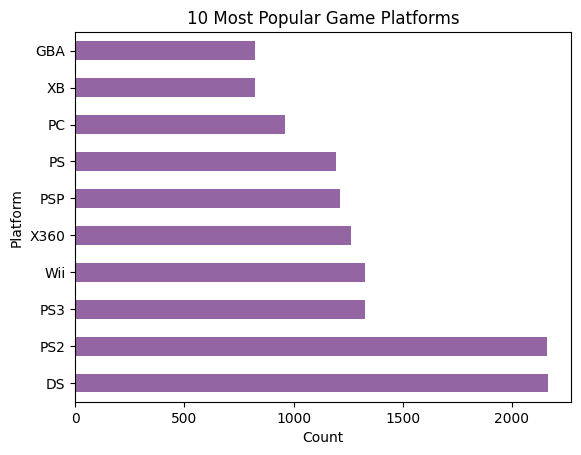

In [82]:
platform_plot = game_sales['Platform'].value_counts().head(10).plot(kind='barh', title='10 Most Popular Game Platforms', color='#9366a3')
platform_plot.set_ylabel('Platform')
platform_plot.set_xlabel('Count')

We can repeat the same process for the Years, Publishers, and Genres columns.

In [83]:
game_sales['Year'].value_counts().head(5)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: count, dtype: int64

In [84]:
game_sales['Year'].value_counts().tail(5)

Year
1985.0    14
1984.0    14
1980.0     9
2017.0     3
2020.0     1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

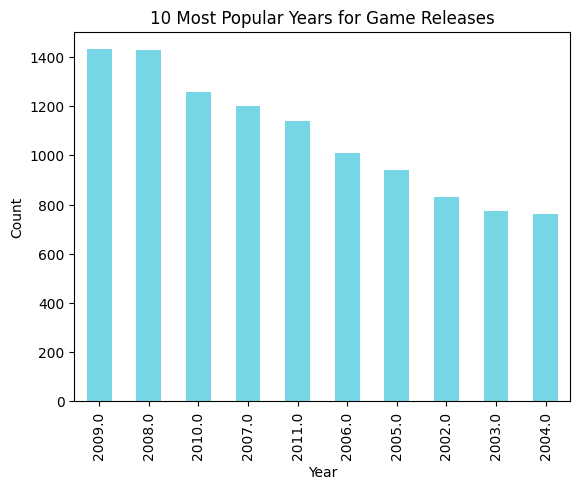

In [85]:
top_years_plot = game_sales['Year'].value_counts().head(10).plot(kind='bar', title='10 Most Popular Years for Game Releases', color='#77D6E5')
top_years_plot.set_ylabel('Count')

Using a histogram gives a stronger visual of how the top years look in regards to the other years in the dataset.

Text(0.5, 0, 'Year')

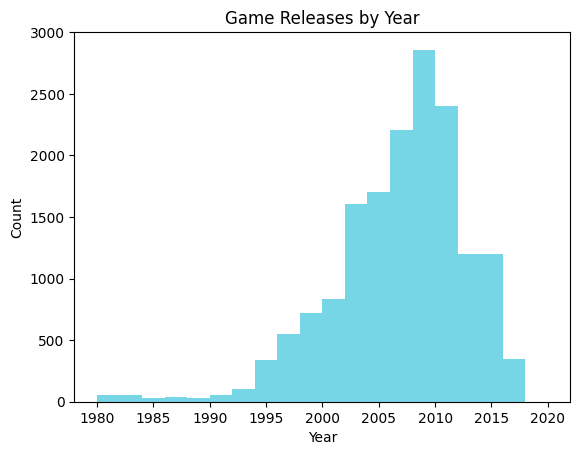

In [86]:
years_plot = game_sales['Year'].plot(kind='hist', bins=20, title='Game Releases by Year', color='#77D6E5')
years_plot.set_ylabel('Count')
years_plot.set_xlabel('Year')

In [87]:
game_sales['Publisher'].value_counts().head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

In [88]:
game_sales['Genre'].value_counts().head(10)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64

Now that we have explored the features of the dataset, we can start exploring the relationship between features.
For this dataset, we mainly want to look at how the Global Sales is affected by the Platform, Year, Publisher, and Genre.

### Step 4: Exploring Feature Relationships

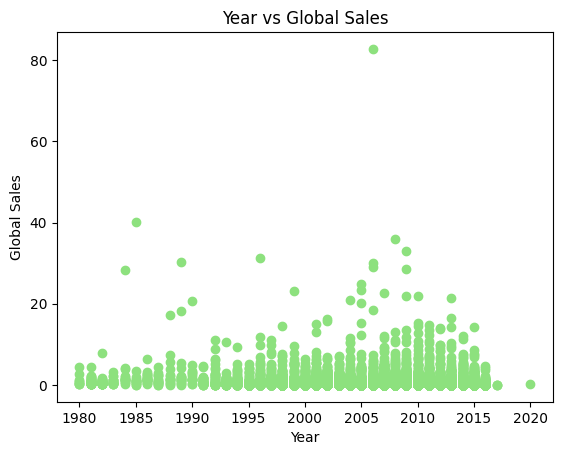

In [89]:
plt.scatter(game_sales['Year'], game_sales['Global_Sales'], color='#8DE17E')
plt.title('Year vs Global Sales')
plt.ylabel('Global Sales')
plt.xlabel('Year')
plt.show()

Observations:
<br>Further years have higher global game sales. This makes sense as video games have gotten more popular in more recent years. 
<br>The time period with the highest sales is 2005-2010.
<br>In 2009, there is an outlier game with a huge amount of global sales.

A heatmap shows the correlation between the columns of the dataset.

In [90]:
game_sales_corr = game_sales_prepared[['Platform', 'Genre', 'Publisher', 'Year', 'Global_Sales']].dropna().corr()
game_sales_corr

,Platform,Genre,Publisher,Year,Global_Sales
Platform,1.000000,0.058550,0.088166,-0.124849,-0.088139
Genre,0.058550,1.000000,0.140942,0.124013,-0.062594
Publisher,0.088166,0.140942,1.000000,0.094023,-0.147879
Year,-0.124849,0.124013,0.094023,1.000000,-0.074735
Global_Sales,-0.088139,-0.062594,-0.147879,-0.074735,1.000000


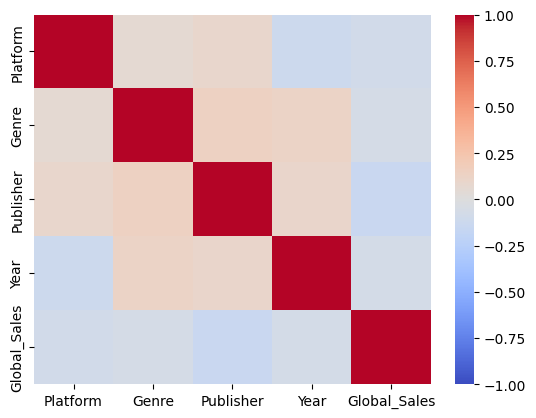

In [115]:
sns.heatmap(game_sales_corr, vmin=-1, cmap='coolwarm')
plt.show()

The heatmap shows us that there is not a strong correlation between features.

Features such as Genre, Publisher, and Year have a very slight correlation but otherwise there is no other notable correlation.

### Step 5: Answering Questions
Question 1: What game genres are best and worst selling?

In [120]:
game_sales_genre = game_sales.groupby('Genre')['Global_Sales'].sum()
game_sales_genre.sort_values()

Genre
Strategy         175.12
Adventure        239.04
Puzzle           244.95
Simulation       392.20
Fighting         448.91
Racing           732.04
Misc             809.96
Platform         831.37
Role-Playing     927.37
Shooter         1037.37
Sports          1330.93
Action          1751.18
Name: Global_Sales, dtype: float64

The best selling game genre is Action and the worst selling is Strategy.

As an extra bonus, we can look at what the best game of each genre is and how much it sold.

In [121]:
game_sales.groupby('Genre').first()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,
Action,17,Grand Theft Auto V,PS3,2013.0,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
Adventure,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Nintendo,6.16,2.04,2.69,0.29,11.18
Fighting,40,Super Smash Bros. Brawl,Wii,2008.0,Nintendo,6.75,2.61,2.66,1.02,13.04
Misc,8,Wii Play,Wii,2006.0,Nintendo,14.03,9.20,2.93,2.85,29.02
Platform,2,Super Mario Bros.,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24
Puzzle,6,Tetris,GB,1989.0,Nintendo,23.20,2.26,4.22,0.58,30.26
Racing,3,Mario Kart Wii,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82
Role-Playing,5,Pokemon Red/Pokemon Blue,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37
Shooter,10,Duck Hunt,NES,1984.0,Nintendo,26.93,0.63,0.28,0.47,28.31


Question 2: What is the most popular platform for games?

Question 3: What companies have the most successful games?

Question 4: What genres and platforms have the most sales in each country? (NA, EU, JP, and Other)

Forecast the future of game sales based on previous years sales